In [2]:
import numpy as np # 수치 계산
import matplotlib.pyplot as plt # 데이터 시각화
from sklearn.linear_model import LinearRegression # 선형 회귀 모델
from sklearn.metrics import mean_squared_error #  평균 제곱 오차 측정 함수
from sklearn.preprocessing import PolynomialFeatures # 다항 특징 생성

x1: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x2: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05]
t1: [1.47665133 2.77859648 2.7459282  1.00264239 1.46120561 2.46109995
 3.8563382  3.14129623 2.06281953 2.86193263 4.09066503]
t2: [1.83478649 2.31697276 2.1854964  0.59038313 1.85914504 3.33319756
 3.52664472 3.05765853 2.31783172 3.46115088 5.10617497]


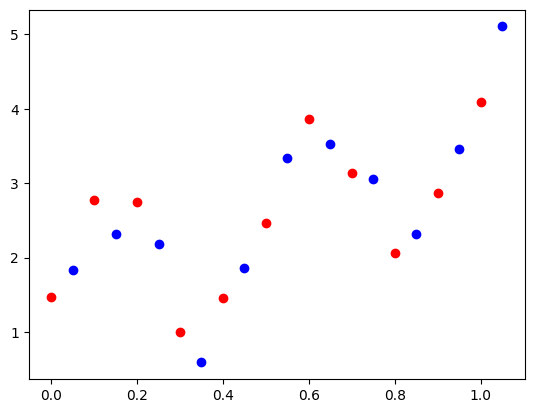

In [30]:
# 데이터 생성 및 시각화
np.random.seed(195397) # 본인 학번 이용 / 난수 생성

x1 = np.linspace(0,1,11)
x2 = np.linspace(0+0.05,1+0.05,11)

print("x1:",x1)
print("x2:",x2)

# 복잡한 관계(지수함수와 사인 함수의 결합, 임의의 노이즈 추가)
t1 = np.sin(2*np.pi*2*x1) + np.exp(x1*1.2) + 1*np.random.rand(11)
t2 = np.sin(2*np.pi*2*x2) + np.exp(x2*1.2) + 1*np.random.rand(11)

print("t1:",t1)
print("t2:",t2)

plt.plot(x1,t1,'ro') #x1과 t1의 관계를 빨간색 원으로
plt.plot(x2,t2,'bo') #x2와 t2의 관계를 파란색 원으로
plt.show()

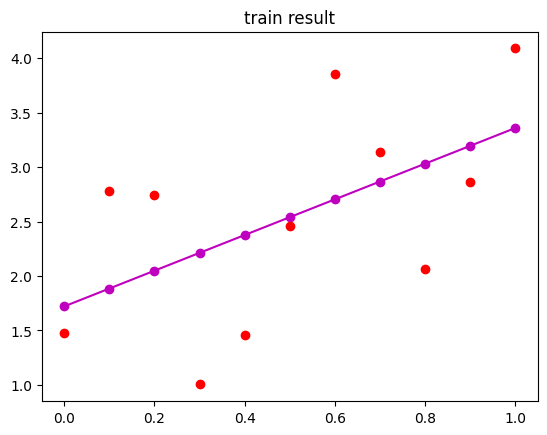

coef: [1.63877522]
intercept: 1.7205374448051725
y train: [1.47665133 2.77859648 2.7459282  1.00264239 1.46120561 2.46109995
 3.8563382  3.14129623 2.06281953 2.86193263 4.09066503]
pred train: [1.72053744 1.88441497 2.04829249 2.21217001 2.37604753 2.53992505
 2.70380257 2.8676801  3.03155762 3.19543514 3.35931266]
train mse: 0.6036000600207373


In [31]:
# training
# x1과 t1을 사용하여 선형 회귀 모델 학습, 학습 결과 평과
# Xtrain = x1.copy() 
Xtrain = x1.reshape(-1,1).copy()
'''
scikit-learn은 입력데이터가 [n_samples, n_features]의 형태
n_samples는 샘플의 수, n_features는 특성의 수
하나의 특성만 사용하는 경우에도 이 특성을 2차원 배열의 형태로 변환해야 한다.
reshape(-1, 1)은 데이터를 [n_samples, 1]의 형태로 만들어 줍니다.
'''
ytrain = t1.copy()
# print(Xtrain)
# print(ytrain)

# fit_intercept 회귀식에 절편 포함
model = LinearRegression(fit_intercept=True)
# xtrain,ytrain에 맞게 학습
model.fit(Xtrain,ytrain)
# 학습된 모델을 사용하여 Xtrain에 대한 예측을 수행. 결과는 ptrain에 저장.
ptrain = model.predict(Xtrain)
# mean_squared_error 함수를 사용하여 실제 값(ytrain)과 예측 값(ptrain) 사이의 평균 제곱 오차(MSE)를 계산. 
# MSE는 모델의 예측 성능을 평가하는 지표 중 하나.
# msetrain = np.mean(np.power(ptrain-ytrain,2))
msetrain = mean_squared_error(ytrain, ptrain)

plt.plot(x1,ptrain,'mo-') # 모델의 예측 결과 자주색
plt.plot(x1,t1,'ro') #학습 데이터 빨간색 원
plt.title("train result")
plt.show()

# 학습된 선형 회귀 모델
print('coef:', model.coef_) #계수_회귀선의 기울기
print('intercept:', model.intercept_) # 절편 y축과 만나는 지점

print('y train:', ytrain) # 실제 값
print('pred train:',ptrain) # 예측 값
print("train mse:", msetrain) # mse


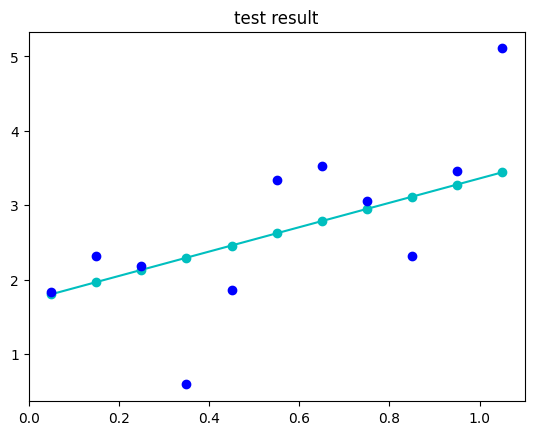

test mse: 0.7176142314979471


In [32]:
# test
Xtest = x2.reshape(-1,1).copy() # 독립변수, 2차원 배열로 변경
ytest = t2.copy() # 종속변수
# xtest에 대한 예측 수행
ptest = model.predict(Xtest)

plt.plot(x2,ptest,'co-') # 예측 값_청록색
plt.plot(x2,t2,'bo') # 실제 타겟 값_파란색
plt.title("test result")
plt.show()
# mse
msetest = mean_squared_error(ytest, ptest)
print("test mse:", msetest)

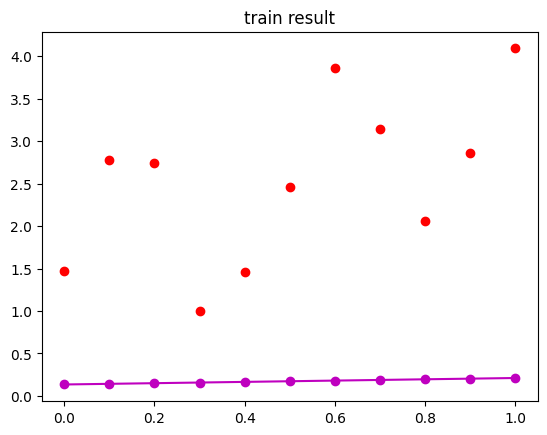

coef: [0.07624449]
intercept: [0.13489396]
y train: [1.47665133 2.77859648 2.7459282  1.00264239 1.46120561 2.46109995
 3.8563382  3.14129623 2.06281953 2.86193263 4.09066503]
pred train: [0.13489396 0.14251841 0.15014286 0.15776731 0.16539175 0.1730162
 0.18064065 0.1882651  0.19588955 0.203514   0.21113845]
train mse: 6.45000779255306


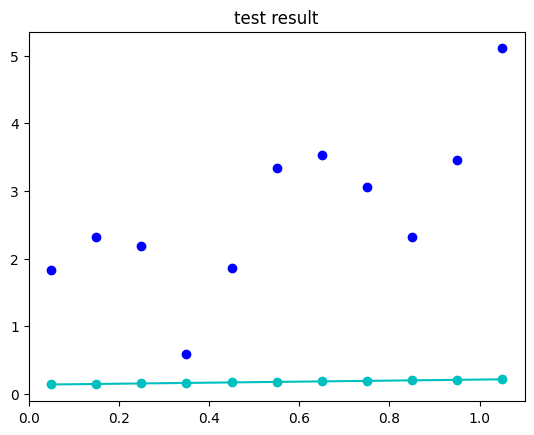

test mse: 7.554336523511234


In [33]:
# 경사 하강법 사용하여 x1, t1, 기반으로 모델 학습
# 테스트 셋 x2, t2에서 예측 성능 평가
from sklearn.linear_model import SGDRegressor
 
Xtrain = x1.reshape(-1,1).copy()
ytrain = t1.copy()

model = SGDRegressor(loss="squared_error", # 손실함수_제곱 오차
                     penalty=None, # 규제 적용X
                     fit_intercept=True, # 절편 학습
                     max_iter=50, # 최대 반복 횟수
                     tol=None, # 반복을 중단할 허용 오차 기준 비활성화
                     learning_rate='constant', # 학습률은 상수
                     eta0=0.0001, # 학습 률
                     verbose=0, # epoch 출력여부_1일때 출력
                     random_state=195397 # 본인학번으로 변경
)
# 모델 학습
model.fit(Xtrain,ytrain)

ptrain = model.predict(Xtrain)

msetrain = mean_squared_error(ytrain, ptrain)
# 학습 데이터 셋 실제값(t1)과 예측 값(ptrain)비교
plt.plot(x1,ptrain,'mo-') # 자주색 원
plt.plot(x1,t1,'ro') # 빨간색 원
plt.title("train result")
plt.show()
# 모델의 계수와 절편 출력
print('coef:', model.coef_)
print('intercept:', model.intercept_)

print('y train:', ytrain) # 실제 값
print('pred train:',ptrain) # 예측 값
print("train mse:", msetrain) # mse

## test
Xtest = x2.reshape(-1,1).copy()
ytest = t2.copy()

ptest = model.predict(Xtest)

plt.plot(x2,ptest,'co-') # 예측 값_청록색
plt.plot(x2,t2,'bo') # 실제 타겟 값_파란색
plt.title("test result")
plt.show()

msetest = mean_squared_error(ytest, ptest)
print("test mse:", msetest)

In [40]:
# x를 polynomial하게 변경하는 방법(degree_차수, interaction_변수 간 상호작용 특성, bias_절편 특성 포함 여부)
# 선형회귀 -> 다항회귀
# xtrain 데이터셋
Xtrain = PolynomialFeatures(1,interaction_only=False, include_bias=False).fit_transform( x1.reshape(-1,1) )
ytrain = t1.copy()
print(Xtrain)
print(ytrain)

# xtest 데이터셋
Xtest = PolynomialFeatures(1,interaction_only=False, include_bias=False).fit_transform( x2.reshape(-1,1) )
ytest = t2.copy()
print(Xtest)
print(ytest)


[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]
[1.47665133 2.77859648 2.7459282  1.00264239 1.46120561 2.46109995
 3.8563382  3.14129623 2.06281953 2.86193263 4.09066503]
[[0.05]
 [0.15]
 [0.25]
 [0.35]
 [0.45]
 [0.55]
 [0.65]
 [0.75]
 [0.85]
 [0.95]
 [1.05]]
[1.83478649 2.31697276 2.1854964  0.59038313 1.85914504 3.33319756
 3.52664472 3.05765853 2.31783172 3.46115088 5.10617497]


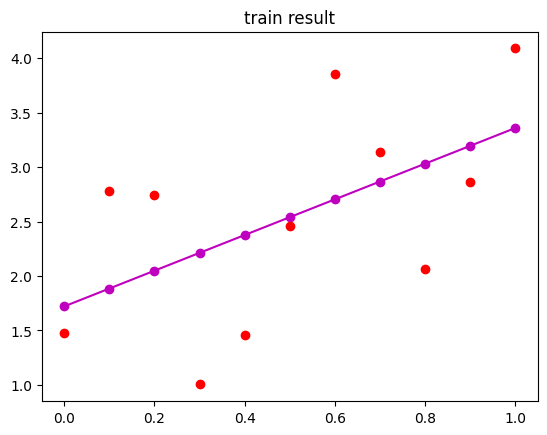

coef: [1.63877522]
intercept: 1.7205374448051725
y train: [1.47665133 2.77859648 2.7459282  1.00264239 1.46120561 2.46109995
 3.8563382  3.14129623 2.06281953 2.86193263 4.09066503]
pred train: [1.72053744 1.88441497 2.04829249 2.21217001 2.37604753 2.53992505
 2.70380257 2.8676801  3.03155762 3.19543514 3.35931266]
train mse: 0.6036000600207373


In [41]:
# training
# x1과 t1을 사용하여 선형 회귀 모델 학습, 학습 결과 평과
# Xtrain = x1.copy() 
# Xtrain = x1.reshape(-1,1).copy()
'''
scikit-learn은 입력데이터가 [n_samples, n_features]의 형태
n_samples는 샘플의 수, n_features는 특성의 수
하나의 특성만 사용하는 경우에도 이 특성을 2차원 배열의 형태로 변환해야 한다.
reshape(-1, 1)은 데이터를 [n_samples, 1]의 형태로 만들어 줍니다.
'''
# ytrain = t1.copy()
# print(Xtrain)
# print(ytrain)

# fit_intercept 회귀식에 절편 포함
model = LinearRegression(fit_intercept=True)
# xtrain,ytrain에 맞게 학습
model.fit(Xtrain,ytrain)
# 학습된 모델을 사용하여 Xtrain에 대한 예측을 수행. 결과는 ptrain에 저장.
ptrain = model.predict(Xtrain)
# mean_squared_error 함수를 사용하여 실제 값(ytrain)과 예측 값(ptrain) 사이의 평균 제곱 오차(MSE)를 계산. 
# MSE는 모델의 예측 성능을 평가하는 지표 중 하나.
# msetrain = np.mean(np.power(ptrain-ytrain,2))
msetrain = mean_squared_error(ytrain, ptrain)

plt.plot(x1,ptrain,'mo-') # 모델의 예측 결과 자주색
plt.plot(x1,t1,'ro') #학습 데이터 빨간색 원
plt.title("train result")
plt.show()

# 학습된 선형 회귀 모델
print('coef:', model.coef_) #계수_회귀선의 기울기
print('intercept:', model.intercept_) # 절편 y축과 만나는 지점

print('y train:', ytrain) # 실제 값
print('pred train:',ptrain) # 예측 값
print("train mse:", msetrain) # mse


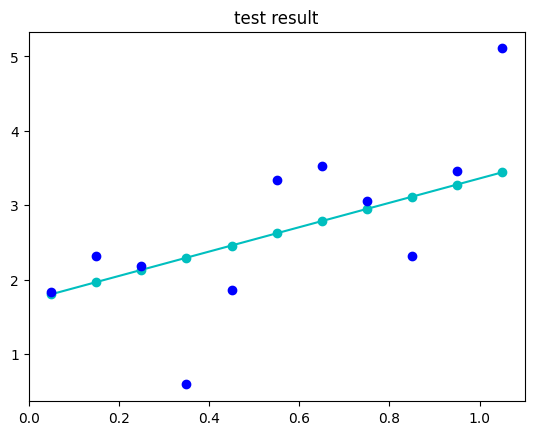

test mse: 0.7176142314979471


In [42]:
# test
# Xtest = x2.reshape(-1,1).copy() # 독립변수, 2차원 배열로 변경
# ytest = t2.copy() # 종속변수
# xtest에 대한 예측 수행
ptest = model.predict(Xtest)

plt.plot(x2,ptest,'co-') # 예측 값_청록색
plt.plot(x2,t2,'bo') # 실제 타겟 값_파란색
plt.title("test result")
plt.show()
# mse
msetest = mean_squared_error(ytest, ptest)
print("test mse:", msetest)